# Data 가져오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
x_data_train = "../data/X_train_std.csv"
y_data_train = "../data/y_train.csv"
x_data_val = "../data/X_val_std.csv"
y_data_val = "../data/y_val.csv"
x_data_test = "../data/X_test_std.csv"
y_data_test = "../data/y_test.csv"

In [3]:
x_train_dataframe = pd.read_csv(x_data_train, delimiter = ",")
y_train_dataframe = pd.read_csv(y_data_train, delimiter = ",")

x_train = np.array(x_train_dataframe.values.tolist())
y_train = np.array(y_train_dataframe.values.tolist())
y_train = y_train.reshape((-1,))

In [4]:
x_val_dataframe = pd.read_csv(x_data_val, delimiter = ",")
y_val_dataframe = pd.read_csv(y_data_val, delimiter = ",")

x_val = np.array(x_val_dataframe.values.tolist())
y_val = np.array(y_val_dataframe.values.tolist())
y_val = y_val.reshape((-1,))

In [5]:
x_test_dataframe = pd.read_csv(x_data_test, delimiter = ",")
y_test_dataframe = pd.read_csv(y_data_test, delimiter = ",")

x_test = np.array(x_test_dataframe.values.tolist())
y_test = np.array(y_test_dataframe.values.tolist())
y_test = y_test.reshape((-1,))

In [6]:
print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)

(3896, 11)
(3896,)
(1299, 11)
(1299,)
(1299, 11)
(1299,)


# SVM 라이브러리

In [7]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.multiclass import OneVsRestClassifier

# 차원축소

In [8]:
def get_LDA(x_data, y_data):
    lda = LinearDiscriminantAnalysis(n_components = 6).fit_transform(x_data, y_data)
    
    return lda

In [9]:
x_train_lda = get_LDA(x_train, y_train)
print("[train] LDA : {} -> {}".format(x_train.shape,x_train_lda.shape))

[train] LDA : (3896, 11) -> (3896, 6)


In [10]:
x_val_lda = get_LDA(x_val, y_val)
print("[validaton] LDA : {} -> {}".format(x_val.shape,x_val_lda.shape))

[validaton] LDA : (1299, 11) -> (1299, 6)


In [11]:
x_test_lda = get_LDA(x_test, y_test)
print("[test] LDA : {} -> {}".format(x_test.shape,x_test_lda.shape))

[test] LDA : (1299, 11) -> (1299, 6)


# 그려보기

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_graph(x_data, y_data):
    x_data_set = pd.DataFrame(x_data)
    y_data_set = pd.DataFrame(y_data, columns = ['quailty'])
    data_set = pd.merge(x_data_set, y_data_set,left_index = True, right_index = True)
    see_maxtrix_use_pyplot(data_set)

def see_maxtrix_use_pyplot(data_set):
    sns.pairplot(data_set, kind="scatter", hue = 'quailty')
    plt.show()

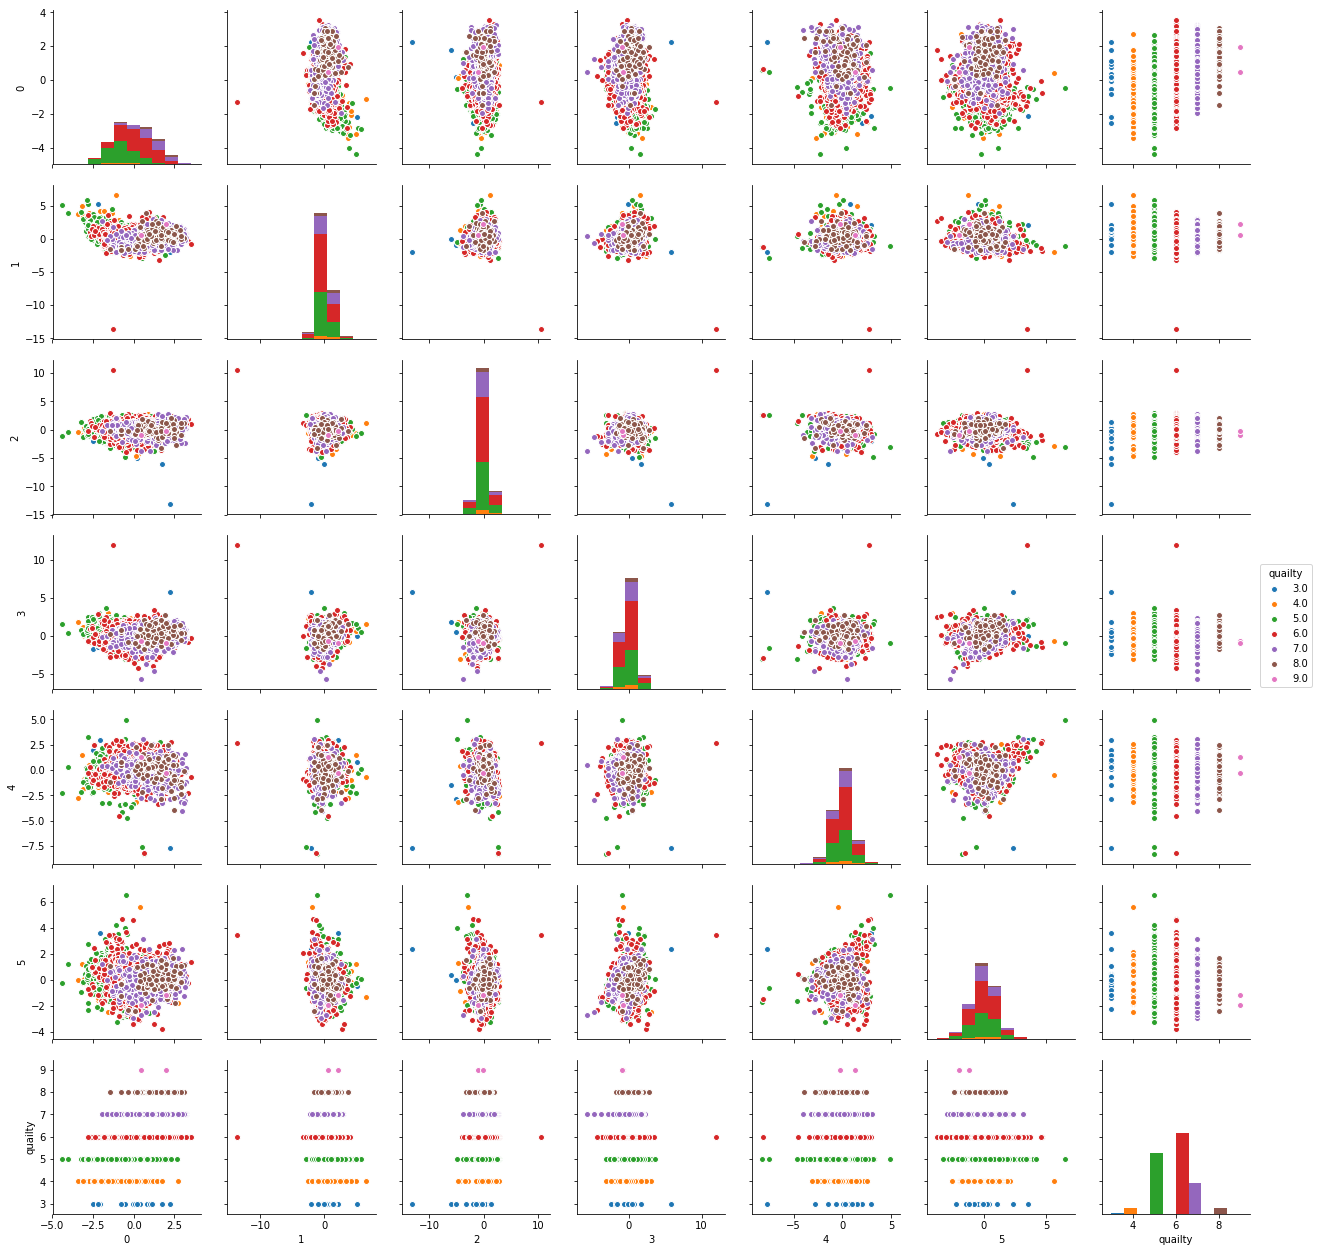

In [13]:
show_graph(x_train_lda, y_train)

# 3차원

In [14]:
def data_processing(data_set):
    xx = []
    yy = []
    zz = []

    for i in range(len(data_set)):
        xx.append(data_set[i][0])
        yy.append(data_set[i][1]) 
        zz.append(data_set[i][2])
    
    return xx, yy, zz

In [15]:
def show_graph_3d(data_set, y_data):
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib as mpl

    xx, yy, zz = data_processing(data_set)
    
    fig = plt.figure(figsize=(30, 25))

    ax = fig.add_subplot(111, projection='3d')

#     v = (np.random.random((6463))-0.5)*15
    
    c = np.abs(y_data)
    cmhot = plt.get_cmap("hot")

    ax.scatter(xx, yy, zz, y_data, c=c, cmap = cmhot, s = 100)
    
    plt.show()

/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/mpl_toolkits/mplot3d/art3d.py:726: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/mpl_toolkits/mplot3d/art3d.py:728: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


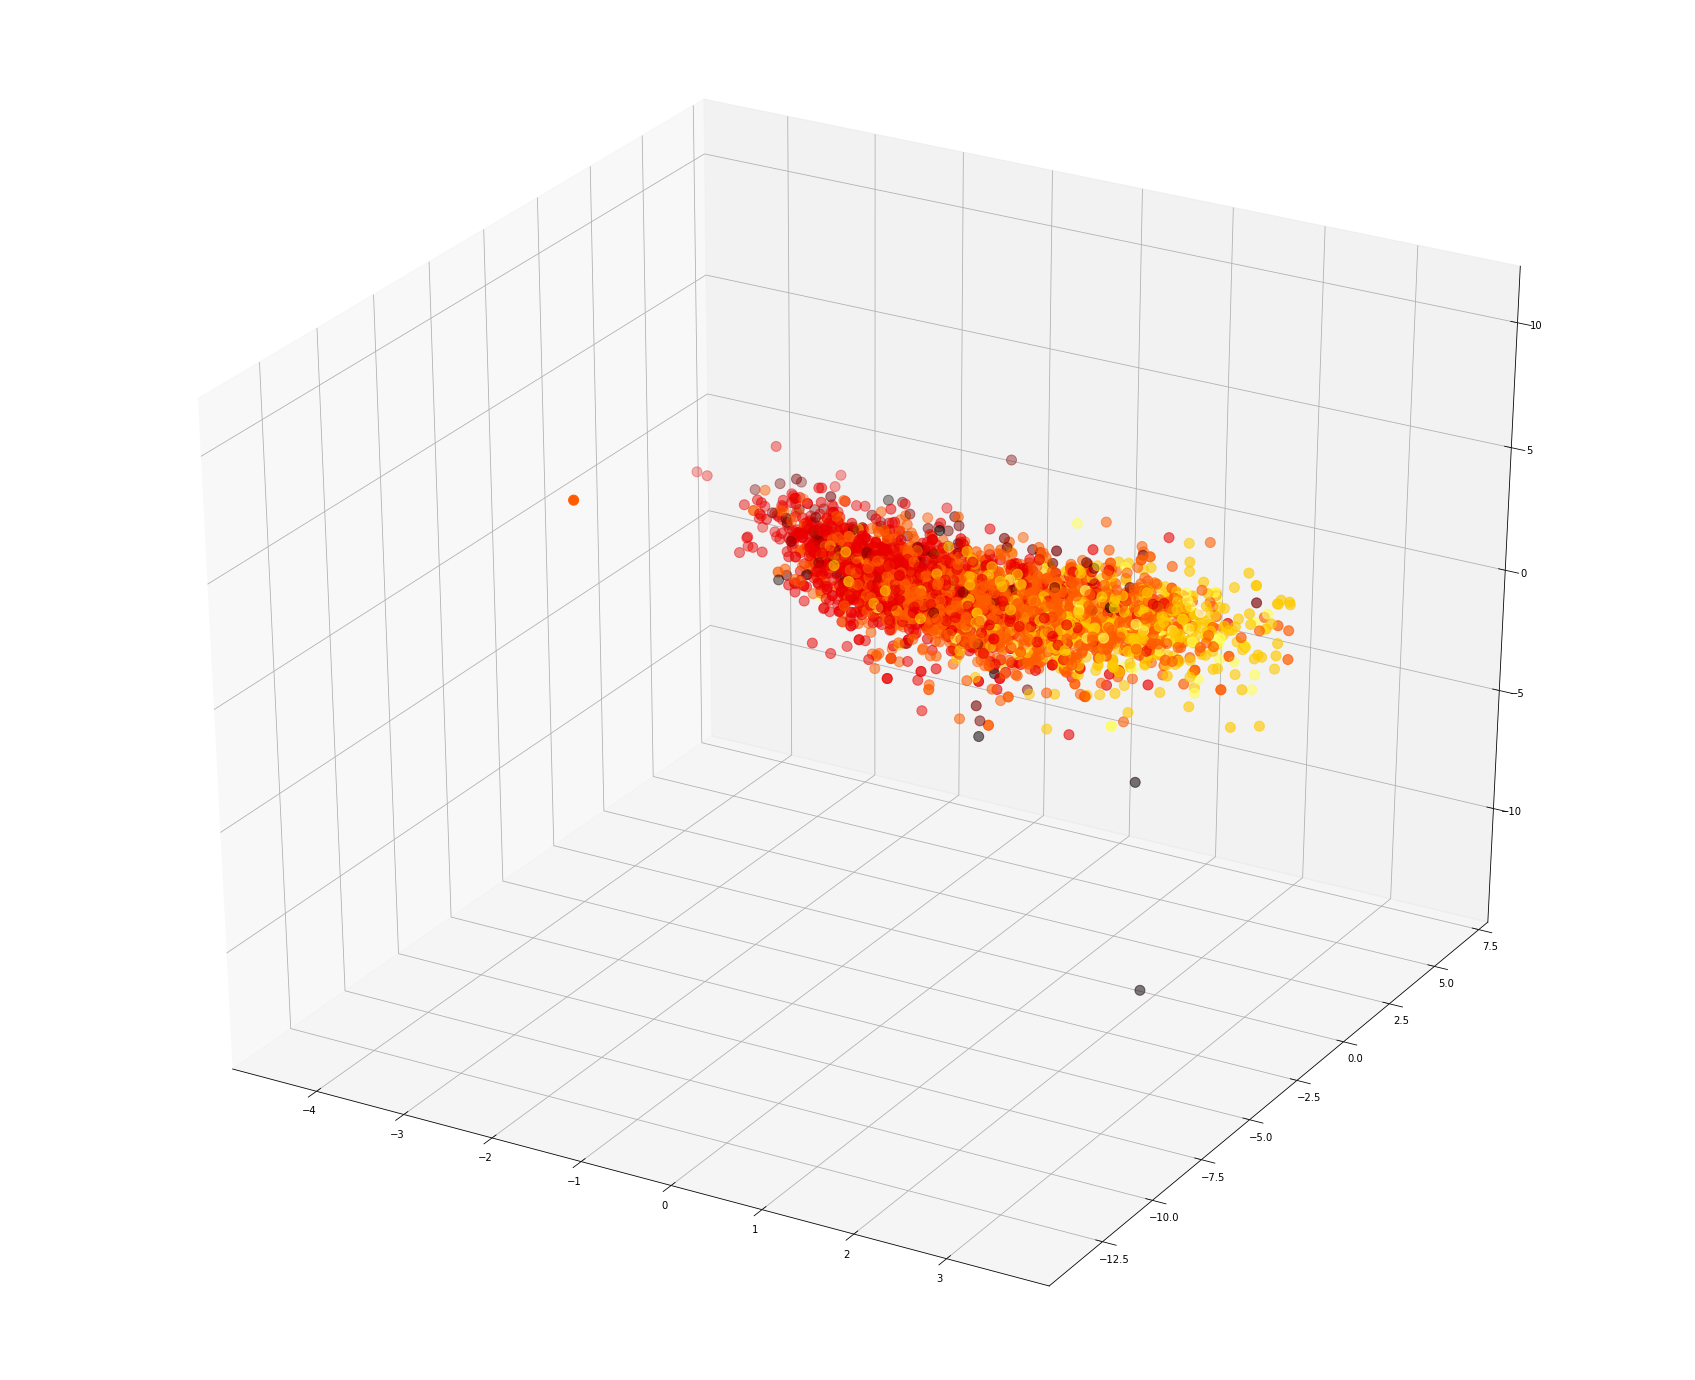

In [16]:
show_graph_3d(x_train_lda, y_train)

# 교차검증을 통한 kernel 선택

In [17]:
model_list = ["SVR", "LinearSVR","NuSVR"]

In [18]:
def svr_select(x_data, y_data):
    kernels = ['linear','poly','rbf'] # 'sigmoid' takes a long time
    svm_model = []
    scores = []
    
    for i in kernels:
        temp_model = OneVsRestClassifier(svm.SVR(C = 1.0, epsilon = 0.1, kernel = i))
        scores.append(cross_val_score(temp_model, x_data, y_data, cv = 5).mean())
    
    for i,j in enumerate(scores):
        print("model : {}, score : {}".format(kernels[i], j))
    
    k = np.argmax(np.array(scores))
    
    return kernels[k]

def nu_select(x_data, y_data):
    kernels = ['linear','poly','rbf'] # 'sigmoid' takes a long time
    svm_model = []
    scores = []
    
    for i in kernels:
        temp_model = OneVsRestClassifier(svm.NuSVR(C = 1.0, nu = 0.5, kernel = i))
        scores.append(cross_val_score(temp_model, x_data, y_data, cv = 5).mean())
    
    for i,j in enumerate(scores):
        print("model : {}, score : {}".format(kernels[i], j))
    
    k = np.argmax(np.array(scores))
    
    return kernels[k]

In [19]:
def model_choice(model_name, x_data, y_data):
    if(model_name == "SVR"):
        kernel = svr_select(x_data, y_data)
        
    elif(model_name == "NuSVR"):
        kernel = nu_select(x_data, y_data)
        
    return kernel

# svr

In [20]:
svr_kernel = model_choice(model_list[0], x_train_lda, y_train)

C_svr = 100
epsilon_svr = 0.3

/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


model : linear, score : 0.442261867146
model : poly, score : 0.52208172276
model : rbf, score : 0.555727729772


In [21]:
def svr():
    svm_model = OneVsRestClassifier(svm.SVR(C = C_svr, epsilon = epsilon_svr, kernel = svr_kernel))

    svm_model.fit(x_train_lda, y_train)
    
    validation_score = svm_model.score(x_val_lda, y_val)
    
    print("Validation score : {:.3f}".format(validation_score))
            
    return svm_model, validation_score 

def get_predictions(model, x_data):
    predictions = model.predict(x_data)
    
    return predictions

m1, validation_score_svr = svr()

Validation score : 0.451


In [22]:
print("train에서 모델 평가 : {:.3f}".format(m1.score(x_train_lda, y_train)))

train에서 모델 평가 : 0.787


In [23]:
y_hat = get_predictions(m1, x_test_lda)
accuracy_svr = accuracy_score(y_test, y_hat)

print("Test 정확도: {:.3f}".format(accuracy_svr))

Test 정확도: 0.441


In [30]:
path = "../parameters/"
svr_p = "SVR_p.csv"

svr_parameters = pd.read_csv(path + svr_p, delimiter = ',')

new_parameters = ["LDA", 6, "SVR",
                   svr_kernel, "default", "default",
                  "default", "default", C_svr,
                  epsilon_svr, "default", "default",
                   "default", "default", validation_score_svr,
                   accuracy_svr]

svr_parameters.loc[-1] = new_parameters

svr_parameters.index = svr_parameters.index + 1

svr_parameters.to_csv(path + svr_p, mode = 'w', index =False)

  de_function  demension model kernel   degree    gamma    coef0      tol  \
0         LDA          6   SVR    NaN  default  default  default  default   
1         LDA          6   SVR    rbf  default  default  default  default   
2         LDA          6   SVR    rbf  default  default  default  default   
3         LDA          6   SVR    rbf  default  default  default  default   

       C  epsilon shrinking    cache  verbose max_iter  validation score  \
0    NaN      NaN   default  default  default  default               NaN   
1  100.0      0.3   default  default  default  default          0.451116   
2  100.0      0.3   default  default  default  default          0.451116   
3  100.0      0.3   default  default  default  default          0.451116   

   accuracy  
0       NaN  
1  0.441109  
2  0.441109  
3  0.441109  


# LinearSVR

In [32]:
linear_C = 1.0
linear_epsilon = 0.0

In [33]:
def linear_svr():
    svm_model = OneVsRestClassifier(svm.LinearSVR(C = linear_C, epsilon = linear_epsilon))

    svm_model.fit(x_train_lda, y_train)
    
    print("Validation score : {:.3f}".format(svm_model.score(x_val_lda, y_val)))
            
    return svm_model

m2 = linear_svr()

Validation score : 0.355


In [34]:
print("모델 평가 : {:.3f}".format(m2.score(x_train_lda, y_train)))

모델 평가 : 0.350


In [35]:
y_hat = get_predictions(m2, x_test_lda)

print("Test set 정확도: {:.3f}".format(accuracy_score(y_test, y_hat)))

Test set 정확도: 0.370


In [37]:
path = "../parameters/"
linear_p = "Linear_p.csv"

linear_parameters = pd.read_csv(path + linear_p, delimiter = ',')

new_parameters = ["LDA", 6, "LinearSVR",
                   linear_epsilon, "default", linear_C,
                  "default", "default", "default",
                  "default", "default", "default",
                  "default", validation_score_svr, accuracy_svr]

linear_parameters.loc[-1] = new_parameters

linear_parameters.index = linear_parameters.index + 1

linear_parameters.to_csv(path + linear_p, mode = 'w', index =False)

# NuSVR

In [ ]:
nu_kernel = model_choice(model_list[2], x_train_lda, y_train)
nu = 0.5
Nu_C = 1.0

In [ ]:
def Nu_svr():
    svm_model = OneVsRestClassifier(svm.NuSVR(C = Nu_C, nu = nu, kernel = nu_kernel))

    svm_model.fit(x_train_lda, y_train)
    
    print("Validation score : {:.3f}".format(svm_model.score(x_val_lda, y_val)))
            
    return svm_model

def get_predictions(model, x_data):
    predictions = model.predict(x_data)
    
    return predictions

m3 = Nu_svr()

In [ ]:
print("모델 평가 : {:.3f}".format(m2.score(x_train_lda, y_train)))

In [ ]:
y_hat = get_predictions(m2, x_test_lda)

print("Test set 정확도: {:.3f}".format(accuracy_score(y_test, y_hat)))

In [ ]:
path = "../parameters/"
Nu_p = "NuSVR_p.csv"

Nu_parameters = pd.read_csv(path + Nu_p, delimiter = ',')

new_parameters = ["LDA", 6, "NuSVR",
                   nu, Nu_C, nu_kernel,
                  "default", "default", "default",
                  "default", "default", "default",
                   "default", "default", validation_score_svr,
                   accuracy_svr]

Nu_parameters.loc[-1] = new_parameters

Nu_parameters.index = Nu_parameters.index + 1

Nu_parameters.to_csv(path + Nu_p, mode = 'w', index =False)

https://wdprogrammer.tistory.com/29

https://m.blog.naver.com/PostView.nhn?blogId=owl6615&logNo=221459656642&proxyReferer=https:%2F%2Fwww.google.com%2F